# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings; warnings.simplefilter('ignore')


In [ ]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime as dt


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('/content/2023-1.parquet')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
import os
current_dir = os.getcwd()
print(current_dir)

/content/drive/MyDrive/EDA


In [ ]:
# from google.colab import drive
#drive.mount('https://drive.google.com/drive/folders/15Ko_s9eXOfIo_AQYXf_btXbYHRFS4Fwv?usp=drive_link')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd


# Select the folder having data files
os.chdir('/content/drive/MyDrive/EDA')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
sampled_df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path, engine='pyarrow')

        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df['date'].unique():
            date_data = df[df['date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]
                # Sample 5% of the hourly data randomly
                #if not hour_data.empty:
                sample = hour_data.sample(frac=0.0075, random_state=42)

                    # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        sampled_df = pd.concat([sampled_df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")



Error reading file Assignments: 'tpep_pickup_datetime'
Error reading file sampled_df.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file taxi_zones: Error creating dataset. Could not read schema from '/content/drive/MyDrive/EDA/taxi_zones/taxi_zones.dbf'. Is this a 'parquet' file?: Could not open Parquet input source '/content/drive/MyDrive/EDA/taxi_zones/taxi_zones.dbf': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file taxi_zones.zip: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file taxi_zones (1).zip: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
sampled_df.to_csv('sampled_df.csv', index= False)
#sampled_data.reset_index(drop=True, inplace=True)
#sampled_data.to_csv('sampled_df.csv', mode='a', header=False, index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
new_data=pd.read_csv('sampled_df.csv')
new_data


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1              2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2              2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3              2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...          ...                  ...                   ...              ...   
284487         1  2023-12-31 23:33:13   2023-12-31 23:42:54              2.0   
284488         1  2023-12-31 23:20:56   2023-12-31 23:39:25              1.0   
284489         1  2023-12-31 23:43:52   2023-12-31 23:46:58              1.0   
284490         2  2023-12-31 23:34:33   2023-12-31 23:45:53              1.0   
284491         1  2023-12-31 23:01:21   2023-12-31 23:12:48              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                7.74         1.0                  N           138   
1                1.24         1.0                  N           161   
2                1.44         1.0                  N           237   
3                0.54         1.0                  N           143   
4               19.24         NaN                NaN            66   
...               ...         ...                ...           ...   
284487           1.40         1.0                  N           233   
284488           3.90         1.0                  N           229   
284489           0.40         1.0                  N            68   
284490           2.54         1.0                  N           144   
284491           2.00         1.0                  N           107   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                256             2  ...      0.5        0.00           0.0   
1                237             1  ...      0.5        2.58           0.0   
2                141             2  ...      0.5        0.00           0.0   
3                142             2  ...      0.5        0.00           0.0   
4                107             0  ...      0.5        5.93           0.0   
...              ...           ...  ...      ...         ...           ...   
284487            43             1  ...      0.5        3.90           0.0   
284488            90             1  ...      0.5        4.95           0.0   
284489           158             1  ...      0.5        2.00           0.0   
284490            12             1  ...      0.5        1.00           0.0   
284491           229             1  ...      0.5        3.55           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         41.15                   0.0   
1                         1.0         15.48                   2.5   
2                         1.0         16.40                   2.5   
3                         1.0         11.50                   2.5   
4                         1.0         35.57                   NaN   
...                       ...           ...                   ...   
284487                    1.0         19.60                   2.5   
284488                    1.0         29.75                   2.5   
284489                    1.0         12.10                   2.5   
284490                    1.0         20.20                   2.5   
284491                    1.0         21.35                   2.5   

        airport_fee        date  hour Airport_fee  
0              1.25  2023-01-01     0         NaN  
1              0.00  2023-01-01     0         NaN  
2              0.00  2023-01-01     0         NaN  
3              0.00  2023-01-01     0         NaN  
4               NaN  2023-01-01     0         NaN  
...             ...         ...   ...         ...  
284487          NaN  2023-12-31    23         0.0  
284488          NaN  202

In [ ]:
#df.head()
new_data.head(200000)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1              2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2              2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3              2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...          ...                  ...                   ...              ...   
199995         2  2023-09-16 19:47:07   2023-09-16 19:59:48              1.0   
199996         2  2023-09-16 19:14:46   2023-09-16 19:26:46              NaN   
199997         2  2023-09-16 19:51:19   2023-09-16 19:57:02              1.0   
199998         2  2023-09-16 19:38:33   2023-09-16 19:46:14              1.0   
199999         1  2023-09-16 19:21:50   2023-09-16 19:32:27              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                7.74         1.0                  N           138   
1                1.24         1.0                  N           161   
2                1.44         1.0                  N           237   
3                0.54         1.0                  N           143   
4               19.24         NaN                NaN            66   
...               ...         ...                ...           ...   
199995           1.44         1.0                  N           224   
199996           1.68         NaN                NaN           229   
199997           0.69         1.0                  N            43   
199998           0.79         1.0                  N           142   
199999           0.90         1.0                  N           249   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                256             2  ...      0.5        0.00           0.0   
1                237             1  ...      0.5        2.58           0.0   
2                141             2  ...      0.5        0.00           0.0   
3                142             2  ...      0.5        0.00           0.0   
4                107             0  ...      0.5        5.93           0.0   
...              ...           ...  ...      ...         ...           ...   
199995           249             1  ...      0.5        3.22           0.0   
199996           100             0  ...      0.5        4.07           0.0   
199997           236             1  ...      0.5        0.00           0.0   
199998           230             2  ...      0.5        0.00           0.0   
199999           211             1  ...      0.0        2.80           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         41.15                   0.0   
1                         1.0         15.48                   2.5   
2                         1.0         16.40                   2.5   
3                         1.0         11.50                   2.5   
4                         1.0         35.57                   NaN   
...                       ...           ...                   ...   
199995                    1.0         19.32                   2.5   
199996                    1.0         24.41                   NaN   
199997                    1.0         11.20                   2.5   
199998                    1.0         12.60                   2.5   
199999                    1.0         17.00                   2.5   

        airport_fee        date  hour Airport_fee  
0              1.25  2023-01-01     0         NaN  
1              0.00  2023-01-01     0         NaN  
2              0.00  2023-01-01     0         NaN  
3              0.00  2023-01-01     0         NaN  
4               NaN  2023-01-01     0         NaN  
...             ...         ...   ...         ...  
199995          NaN  2023-09-16    19         0.0  
199996          NaN  202

In [ ]:
#df.info()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284492 non-null  int64  
 1   tpep_pickup_datetime   284492 non-null  object 
 2   tpep_dropoff_datetime  284492 non-null  object 
 3   passenger_count        275065 non-null  float64
 4   trip_distance          284492 non-null  float64
 5   RatecodeID             275065 non-null  float64
 6   store_and_fwd_flag     275065 non-null  object 
 7   PULocationID           284492 non-null  int64  
 8   DOLocationID           284492 non-null  int64  
 9   payment_type           284492 non-null  int64  
 10  fare_amount            284492 non-null  float64
 11  extra                  284492 non-null  float64
 12  mta_tax                284492 non-null  float64
 13  tip_amount             284492 non-null  float64
 14  tolls_amount           284492 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
#total no. of columns and list of columns
new_data.columns.tolist()
new_data.columns.value_counts()

VendorID                 1
tpep_pickup_datetime     1
tpep_dropoff_datetime    1
passenger_count          1
trip_distance            1
RatecodeID               1
store_and_fwd_flag       1
PULocationID             1
DOLocationID             1
payment_type             1
fare_amount              1
extra                    1
mta_tax                  1
tip_amount               1
tolls_amount             1
improvement_surcharge    1
total_amount             1
congestion_surcharge     1
airport_fee              1
date                     1
hour                     1
Airport_fee              1
Name: count, dtype: int64

In [ ]:
# Fix the index and drop any columns that are not needed
new_data.reset_index(drop=True, inplace=True)
new_data.drop('store_and_fwd_flag', axis=1)
new_data

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0            2.0  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1            2.0  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2            2.0  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3            2.0  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4            2.0  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
...          ...                  ...                   ...              ...   
284487       1.0  2023-12-31 23:33:13   2023-12-31 23:42:54              2.0   
284488       1.0  2023-12-31 23:20:56   2023-12-31 23:39:25              1.0   
284489       1.0  2023-12-31 23:43:52   2023-12-31 23:46:58              1.0   
284490       2.0  2023-12-31 23:34:33   2023-12-31 23:45:53              1.0   
284491       1.0  2023-12-31 23:01:21   2023-12-31 23:12:48              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                7.74         1.0                  N         138.0   
1                1.24         1.0                  N         161.0   
2                1.44         1.0                  N         237.0   
3                0.54         1.0                  N         143.0   
4               19.24         1.0                  N          66.0   
...               ...         ...                ...           ...   
284487           1.40         1.0                  N         233.0   
284488           3.90         1.0                  N         229.0   
284489           0.40         1.0                  N          68.0   
284490           2.54         1.0                  N         144.0   
284491           2.00         1.0                  N         107.0   

        DOLocationID  payment_type  ...  airport_fee        date  hour  \
0              256.0           2.0  ...         1.25  2023-01-01   0.0   
1              237.0           1.0  ...         0.00  2023-01-01   0.0   
2              141.0           2.0  ...         0.00  2023-01-01   0.0   
3              142.0           2.0  ...         0.00  2023-01-01   0.0   
4              107.0           1.0  ...         0.00  2023-01-01   0.0   
...              ...           ...  ...          ...         ...   ...   
284487          43.0           1.0  ...         0.00  2023-12-31  23.0   
284488          90.0           1.0  ...         0.00  2023-12-31  23.0   
284489         158.0           1.0  ...         0.00  2023-12-31  23.0   
284490          12.0           1.0  ...         0.00  2023-12-31  23.0   
284491         229.0           1.0  ...         0.00  2023-12-31  23.0   

        Airport_fee  combined_airport_fee  pickup_day  pickup_day_name  \
0               0.0                  1.25           6           Sunday   
1               0.0                  0.00           6           Sunday   
2               0.0                  0.00           6           Sunday   
3               0.0                  0.00           6           Sunday   
4               0.0                  0.00           6           Sunday   
...             ...                   ...         ...              ...   
284487          0.0                  0.00           6           Sunday   
284488          0.0                  0.00           6           Sunday   
284489          0.0                  0.00           6           Sunday   
284490          0.0                  0.00           6           Sunday   
284491          0.0                  0.00           6           Sunday   

        pickup_month  quarter trip_duration  
0                  1        1     15.950000  
1                  1        1      5.083333  
2                  1        1     10.550000  
3                  1        1      5.416667  
4                  1        1     18.000000  
...              ...      ...           ...  
284487            12        4      9.683333  
284488            12        4     18.483333  
284489        

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
new_data.columns.tolist()
new_data['combined_airport_fee'] = new_data[['airport_fee', 'Airport_fee']].fillna(0).sum(axis=1)
new_data['airport_fee'].isnull().sum()

np.int64(262204)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
 # Filter rows where fare_amount is negative
negative_fares = new_data[new_data['fare_amount'] < 0]

# Display the result
negative_fares
#negative_fares.shape

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour, Airport_fee, combined_airport_fee]
Index: []

[0 rows x 23 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

# Count how many negative fare rows per RatecodeID
ratecode_counts = negative_fares['RatecodeID'].value_counts().reset_index()
ratecode_counts.columns = ['RatecodeID', 'Count']

# Display the result
ratecode_counts

Empty DataFrame
Columns: [RatecodeID, Count]
Index: []

In [ ]:
# Find which columns have negative values

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Dictionary to hold columns with negative values
negative_value_cols = {}

# Loop through and check for negatives
for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        negative_value_cols[col] = negative_count

# Display results
if negative_value_cols:
    print("Columns with negative values and their counts:")
    for col, count in negative_value_cols.items():
        print(f"{col}: {count}")
else:
    print("No columns have negative values.")


No columns have negative values.


In [ ]:
# fix these negative values


# Step 1: Select numeric columns
numeric_cols = new_data.select_dtypes(include='number').columns

# Step 2: Replace negative values with NaN
for col in numeric_cols:
    new_data.loc[new_data[col] < 0, col] = np.nan

# Step 3: Fill those NaNs with column medians
new_data[numeric_cols] = new_data[numeric_cols].fillna(new_data[numeric_cols].median())
new_data[numeric_cols]

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0            2.0              1.0           7.74         1.0         138.0   
1            2.0              2.0           1.24         1.0         161.0   
2            2.0              3.0           1.44         1.0         237.0   
3            2.0              1.0           0.54         1.0         143.0   
4            2.0              1.0          19.24         1.0          66.0   
...          ...              ...            ...         ...           ...   
284487       1.0              2.0           1.40         1.0         233.0   
284488       1.0              1.0           3.90         1.0         229.0   
284489       1.0              1.0           0.40         1.0          68.0   
284490       2.0              1.0           2.54         1.0         144.0   
284491       1.0              1.0           2.00         1.0         107.0   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0              256.0           2.0        32.40    6.0      0.5        0.00   
1              237.0           1.0         7.90    1.0      0.5        2.58   
2              141.0           2.0        11.40    1.0      0.5        0.00   
3              142.0           2.0         6.50    1.0      0.5        0.00   
4              107.0           0.0        25.64    0.0      0.5        5.93   
...              ...           ...          ...    ...      ...         ...   
284487          43.0           1.0        10.70    3.5      0.5        3.90   
284488          90.0           1.0        19.80    3.5      0.5        4.95   
284489         158.0           1.0         5.10    3.5      0.5        2.00   
284490          12.0           1.0        14.20    1.0      0.5        1.00   
284491         229.0           1.0        12.80    3.5      0.5        3.55   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         41.15   
1                0.0                    1.0         15.48   
2                0.0                    1.0         16.40   
3                0.0                    1.0         11.50   
4                0.0                    1.0         35.57   
...              ...                    ...           ...   
284487           0.0                    1.0         19.60   
284488           0.0                    1.0         29.75   
284489           0.0                    1.0         12.10   
284490           0.0                    1.0         20.20   
284491           0.0                    1.0         21.35   

        congestion_surcharge  airport_fee  hour  Airport_fee  \
0                        0.0         1.25   0.0          0.0   
1                        2.5         0.00   0.0          0.0   
2                        2.5         0.00   0.0          0.0   
3                        2.5         0.00   0.0          0.0   
4                        2.5         0.00   0.0          0.0   
...                      ...          ...   ...          ...   
284487                   2.5         0.00  23.0          0.0   
284488                   2.5         0.00  23.0          0.0   
284489                   2.5         0.00  23.0          0.0   
284490                   2.5         0.00  23.0          0.0   
284491                   2.5         0.00  23.0          0.0   

        combined_airport_fee  
0                       1.25  
1                       0.00  
2                       0.00  
3                       0.00  
4                       0.00  
...                      ...  
284487                  0.00  
284488                  0.00  
284489                  0.00  
284490                  0.00  
284491                  0.00  

[284492 rows x 19 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

# Calculate proportion of missing values for each column
missing_proportions = df.isnull().mean().sort_values(ascending=False)

# Convert to percentage (optional)
missing_percentages = (missing_proportions * 100).round(2)

missing_proportions
missing_percentages


Series([], dtype: float64)

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

null_rows=new_data[new_data['passenger_count'].isnull()]
null_rows

# Find the most common passenger count




Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour, Airport_fee, combined_airport_fee]
Index: []

[0 rows x 23 columns]

In [ ]:
# Impute NaN values in 'passenger_count'

# Find the most common passenger count
mode_passenger=new_data['passenger_count'].fillna(new_data['passenger_count'].mode())
mode_passenger

0         1.0
1         2.0
2         3.0
3         1.0
4         1.0
         ... 
284487    2.0
284488    1.0
284489    1.0
284490    1.0
284491    1.0
Name: passenger_count, Length: 284492, dtype: float64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
new_data['RatecodeID'].value_counts(dropna=True)

RatecodeID
1.0     269068
2.0      10799
99.0      1633
5.0       1541
3.0        902
4.0        549
Name: count, dtype: int64

In [ ]:
# Fix missing values in 'RatecodeID'
mode_ratecode=new_data['RatecodeID'].fillna(new_data['RatecodeID'].mode())
mode_ratecode.isnull().sum()


np.int64(0)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

#Fill missing values in 'congestion_surcharge' with the mean

mean_surcharge=new_data['congestion_surcharge'].fillna(new_data['congestion_surcharge'].mean())
mean_surcharge


0         0.0
1         2.5
2         2.5
3         2.5
4         2.5
         ... 
284487    2.5
284488    2.5
284489    2.5
284490    2.5
284491    2.5
Name: congestion_surcharge, Length: 284492, dtype: float64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
# Show count and proportion of missing values per column


# Fill missing numeric columns with the median
numeric_cols = new_data.select_dtypes(include='number').columns
new_data[numeric_cols] = new_data[numeric_cols].fillna(new_data[numeric_cols].median())

# Fill missing categorical columns with the mode
categorical_cols = new_data.select_dtypes(include='object').columns
for col in categorical_cols:
    new_data[col].fillna(new_data[col].mode()[0], inplace=True)
    # Count and proportion of missing values
missing_count = new_data.isnull().sum()
missing_proportion = new_data.isnull().mean()

# Combine into a DataFrame for summary
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Proportion': missing_proportion
}).sort_values(by='Missing Count', ascending=False)

# Display columns with missing values
print("Missing value summary per column:")
print(missing_summary[missing_summary['Missing Count'] > 0])
# Verify if there are any remaining missing values
final_missing = new_data.isnull().sum()

# Display the result (should show 0 for all columns)
print("Remaining missing values (should be 0):")
print(final_missing[final_missing > 0])



Missing value summary per column:
Empty DataFrame
Columns: [Missing Count, Missing Proportion]
Index: []
Remaining missing values (should be 0):
Series([], dtype: int64)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

new_data.describe()
# Function to identify outliers using IQR method
def find_outliers(new_data, column):
    Q1 = new_data[column].quantile(0.25)
    Q3 = new_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = new_data[(new_data[column] < lower_bound) | (new_data[column] > upper_bound)]
    return outliers

# List of numeric columns to check for outliers
numeric_cols = new_data.select_dtypes(include='number').columns

# Checking for outliers in each numeric column
outlier_summary = {}
for col in numeric_cols:
    outliers = find_outliers(new_data, col)
    outlier_summary[col] = len(outliers)

print("Outlier count per numeric column:")
print(outlier_summary)
# Check for potential out-of-place values
out_of_place_values = {
    'fare_amount': new_data[new_data['fare_amount'] < 0],
    'passenger_count': new_data[new_data['passenger_count'] <= 0],
    'trip_distance': new_data[new_data['trip_distance'] < 0],  # Can't have negative trip distance
    'tip_amount': new_data[new_data['tip_amount'] < 0],
    'total_amount': new_data[new_data['total_amount'] < 0],
}

# Display rows with out-of-place values
for column, outliers in out_of_place_values.items():
    print(f"Out-of-place values in {column}:")
    print(outliers)


Outlier count per numeric column:
{'VendorID': 68, 'passenger_count': 67809, 'trip_distance': 37135, 'RatecodeID': 15424, 'PULocationID': 0, 'DOLocationID': 0, 'payment_type': 60445, 'fare_amount': 29346, 'extra': 4955, 'mta_tax': 2649, 'tip_amount': 21719, 'tolls_amount': 22979, 'improvement_surcharge': 321, 'total_amount': 32694, 'congestion_surcharge': 21074, 'airport_fee': 1958, 'hour': 0, 'Airport_fee': 22168, 'combined_airport_fee': 24126}
Out-of-place values in fare_amount:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour, Airport_fee, combined_airport_fee]
Index: []

[0 rows x 23 columns]
Out-of-place values in passenger_count:
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6

#new_data[new_data['passenger_count'] <= 6]
# Find the rows where passenger_count > 6
rows_to_drop = new_data[new_data['passenger_count'] > 6].index

# Drop those rows from the DataFrame
new_data.drop(rows_to_drop)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0            2.0  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1            2.0  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2            2.0  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3            2.0  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4            2.0  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
...          ...                  ...                   ...              ...   
284487       1.0  2023-12-31 23:33:13   2023-12-31 23:42:54              2.0   
284488       1.0  2023-12-31 23:20:56   2023-12-31 23:39:25              1.0   
284489       1.0  2023-12-31 23:43:52   2023-12-31 23:46:58              1.0   
284490       2.0  2023-12-31 23:34:33   2023-12-31 23:45:53              1.0   
284491       1.0  2023-12-31 23:01:21   2023-12-31 23:12:48              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                7.74         1.0                  N         138.0   
1                1.24         1.0                  N         161.0   
2                1.44         1.0                  N         237.0   
3                0.54         1.0                  N         143.0   
4               19.24         1.0                  N          66.0   
...               ...         ...                ...           ...   
284487           1.40         1.0                  N         233.0   
284488           3.90         1.0                  N         229.0   
284489           0.40         1.0                  N          68.0   
284490           2.54         1.0                  N         144.0   
284491           2.00         1.0                  N         107.0   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0              256.0           2.0  ...        0.00           0.0   
1              237.0           1.0  ...        2.58           0.0   
2              141.0           2.0  ...        0.00           0.0   
3              142.0           2.0  ...        0.00           0.0   
4              107.0           0.0  ...        5.93           0.0   
...              ...           ...  ...         ...           ...   
284487          43.0           1.0  ...        3.90           0.0   
284488          90.0           1.0  ...        4.95           0.0   
284489         158.0           1.0  ...        2.00           0.0   
284490          12.0           1.0  ...        1.00           0.0   
284491         229.0           1.0  ...        3.55           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         41.15                   0.0   
1                         1.0         15.48                   2.5   
2                         1.0         16.40                   2.5   
3                         1.0         11.50                   2.5   
4                         1.0         35.57                   2.5   
...                       ...           ...                   ...   
284487                    1.0         19.60                   2.5   
284488                    1.0         29.75                   2.5   
284489                    1.0         12.10                   2.5   
284490                    1.0         20.20                   2.5   
284491                    1.0         21.35                   2.5   

        airport_fee        date  hour  Airport_fee combined_airport_fee  
0              1.25  2023-01-01   0.0          0.0                 1.25  
1              0.00  2023-01-01   0.0          0.0                 0.00  
2              0.00  2023-01-01   0.0          0.0                 0.00  
3              0.00  2023-01-01   0.0          0.0                 0.00  
4              0.00  2023-01-01   0.0          0.0                 0.00  
...             ...         ...   ...          ...                  ...  
284487         0.00  2023-12-3

In [ ]:
# Continue with outlier handling
new_data[~((new_data['trip_distance'] <= 0.01) & (new_data['fare_amount'] > 300))]
new_data[~((new_data['trip_distance'] == 0) & (new_data['fare_amount'] == 0) & (new_data['tpep_pickup_datetime'] != new_data['tpep_dropoff_datetime']))]
# Cap trip_distance to a maximum of 250 miles
new_data['trip_distance'] = new_data['trip_distance'].apply(lambda x: min(x, 250))
# Impute payment_type where it is 0 with the most frequent valid payment_type
most_frequent_payment_type = new_data[new_data['payment_type'] != 0]['payment_type'].mode()[0]
new_data['payment_type'].replace(0, most_frequent_payment_type, inplace=True)
# Verify if any outliers remain after handling
print("Remaining outliers after fixes:")

# Checking for remaining outliers in trip_distance and fare_amount (as examples)
print(new_data[(new_data['trip_distance'] > 250) | (new_data['fare_amount'] > 300)])

# Check for any entries with payment_type = 0 (should be fixed)
print(new_data[new_data['payment_type'] == 0])

Remaining outliers after fixes:
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2103         2.0  2023-01-04 16:31:43   2023-01-04 17:23:10              1.0   
19114        2.0  2023-01-26 23:31:17   2023-01-27 00:32:14              1.0   
43035        2.0  2023-03-29 00:01:01   2023-03-29 01:20:04              1.0   
48908        2.0  2023-06-01 21:09:11   2023-06-01 22:26:50              1.0   
64998        2.0  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
71856        2.0  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
82366        2.0  2023-08-15 06:10:57   2023-08-15 07:23:00              1.0   
83552        2.0  2023-08-16 18:16:57   2023-08-16 19:56:37              1.0   
99838        1.0  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
105138       2.0  2023-02-15 18:13:05   2023-02-15 19:27:51              1.0   
107524       2.0  2023-02-18 17:22:37   2023-02-18 18:46:42              1.0   
118620  

In [ ]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler

# Select columns to standardize
cols_to_standardize = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax',
    'tip_amount', 'tolls_amount', 'improvement_surcharge',
    'total_amount', 'congestion_surcharge'
]

# Create a copy of standardized values
scaler = StandardScaler()
df_scaled = new_data.copy()
df_scaled[cols_to_standardize] = scaler.fit_transform(new_data[cols_to_standardize])
df_scaled[cols_to_standardize]


trip_distance  fare_amount     extra   mta_tax  tip_amount  \
0            0.936127     0.691176  2.419675  0.096521   -0.874828   
1           -0.479115    -0.654692 -0.321963  0.096521   -0.238009   
2           -0.435569    -0.462425 -0.321963  0.096521   -0.874828   
3           -0.631526    -0.731599 -0.321963  0.096521   -0.874828   
4            3.440018     0.319826 -0.870290  0.096521    0.588870   
...               ...          ...       ...       ...         ...   
284487      -0.444279    -0.500878  1.048856  0.096521    0.087806   
284488       0.100045    -0.000985  1.048856  0.096521    0.346977   
284489      -0.662008    -0.808505  1.048856  0.096521   -0.381170   
284490      -0.196067    -0.308612 -0.321963  0.096521   -0.627999   
284491      -0.313641    -0.385518  1.048856  0.096521    0.001416   

        tolls_amount  improvement_surcharge  total_amount  \
0          -0.272403               0.033082      0.539383   
1          -0.272403               0.033082     -0.588513   
2          -0.272403               0.033082     -0.548090   
3          -0.272403               0.033082     -0.763388   
4          -0.272403               0.033082      0.294207   
...              ...                    ...           ...   
284487     -0.272403               0.033082     -0.407487   
284488     -0.272403               0.033082      0.038486   
284489     -0.272403               0.033082     -0.737025   
284490     -0.272403               0.033082     -0.381124   
284491     -0.272403               0.033082     -0.330595   

        congestion_surcharge  
0                  -3.535487  
1                   0.282846  
2                   0.282846  
3                   0.282846  
4                   0.282846  
...                      ...  
284487              0.282846  
284488              0.282846  
284489              0.282846  
284490              0.282846  
284491              0.282846  

[284492 rows x 9 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
new_data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour',
 'Airport_fee',
 'combined_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

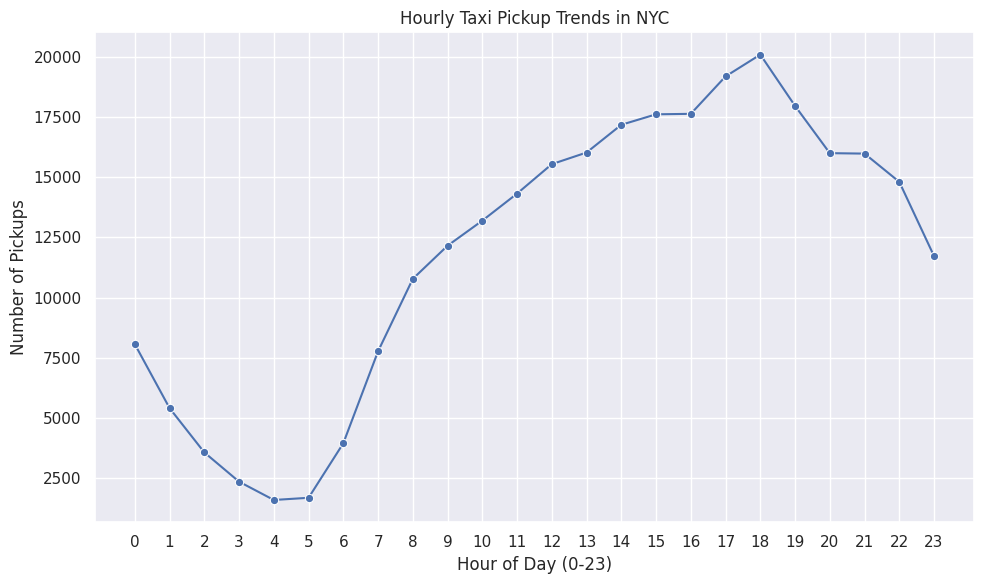

In [ ]:
# Find and show the hourly trends in taxi pickups

# Extract pickup hour
df['pickup_hour'] = pd.to_datetime(new_data['tpep_pickup_datetime']).dt.hour

# Count number of trips per hour
hourly_counts = df['pickup_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title("Hourly Taxi Pickup Trends in NYC")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()




In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

# Ensure pickup datetime is in datetime format
new_data['tpep_pickup_datetime'] = pd.to_datetime(new_data['tpep_pickup_datetime'])

# Extract day of the week (0 = Monday, ..., 6 = Sunday)
new_data['pickup_day'] = new_data['tpep_pickup_datetime'].dt.dayofweek

# convert numeric day to string name
day_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
new_data['pickup_day_name'] = new_data['pickup_day'].map(day_map)

# Count pickups per day (sorted by weekday order)
daily_counts = new_data['pickup_day_name'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday',
    'Friday', 'Saturday', 'Sunday'
])

# Plot the trend
plt.figure(figsize=(10,6))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='coolwarm')
plt.title("NYC Taxi Pickups by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


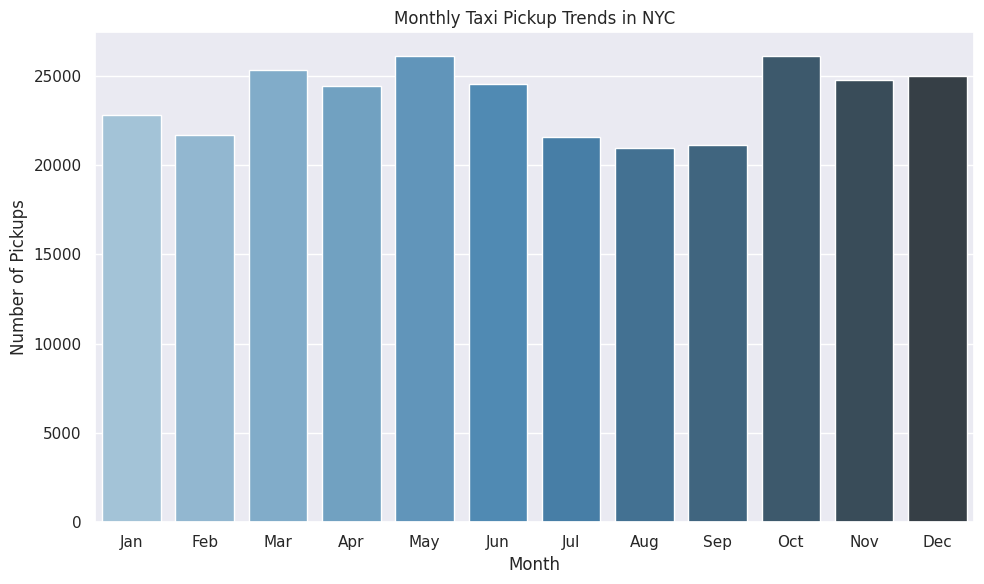

In [ ]:
# Show the monthly trends in pickups
# Ensure pickup time is datetime
new_data['tpep_pickup_datetime'] = pd.to_datetime(new_data['tpep_pickup_datetime'])

# Extract month (e.g., 1 = Jan, 12 = Dec)
new_data['pickup_month'] = new_data['tpep_pickup_datetime'].dt.month

# Count pickups per month
monthly_counts = new_data['pickup_month'].value_counts().sort_index()

# Map month numbers to names
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_counts.index = monthly_counts.index.map(month_map)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='Blues_d')
plt.title("Monthly Taxi Pickup Trends in NYC")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
# Columns to check
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check for zero or negative values
for col in columns_to_check:
    zero_count = (new_data[col] == 0).sum()
    negative_count = (new_data[col] < 0).sum()
    print(f"{col}: {zero_count} zeros, {negative_count} negatives")


fare_amount: 98 zeros, 0 negatives
tip_amount: 65385 zeros, 0 negatives
total_amount: 35 zeros, 0 negatives
trip_distance: 5623 zeros, 0 negatives


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

# Define the selected parameters
selected_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Filter rows where all selected columns are non-zero
non_zero_df = new_data[(new_data[selected_columns] != 0).all(axis=1)].copy()

# Display the shape to confirm filtering
print(f"Original shape: {new_data.shape}")
print(f"Filtered non-zero shape: {non_zero_df.shape}")


Original shape: (284492, 26)
Filtered non-zero shape: (217691, 26)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue
# Ensure 'tpep_pickup_datetime' is in datetime format
new_data['tpep_pickup_datetime'] = pd.to_datetime(new_data['tpep_pickup_datetime'])

# Extract month from the pickup datetime
new_data['pickup_month'] = new_data['tpep_pickup_datetime'].dt.month

# Group by month and calculate total revenue (sum of 'total_amount')
monthly_revenue = new_data.groupby('pickup_month')['total_amount'].sum().sort_index()

# Optional: Map month numbers to month names for better readability
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_revenue.index = monthly_revenue.index.map(month_map)

# Plot the monthly revenue trend
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='blue')
plt.title("Monthly Revenue Trend for NYC Taxi (Total Amount)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display total monthly revenue
print(monthly_revenue)



pickup_month
Jan    627224.63
Feb    595182.75
Mar    713564.30
Apr    699480.21
May    769154.13
Jun    722996.78
Jul    621857.64
Aug    607679.35
Sep    638913.69
Oct    778678.16
Nov    714977.62
Dec    724736.07
Name: total_amount, dtype: float64


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

quarter
1    0.235679
2    0.266802
3    0.227459
4    0.270060
Name: total_amount, dtype: float64


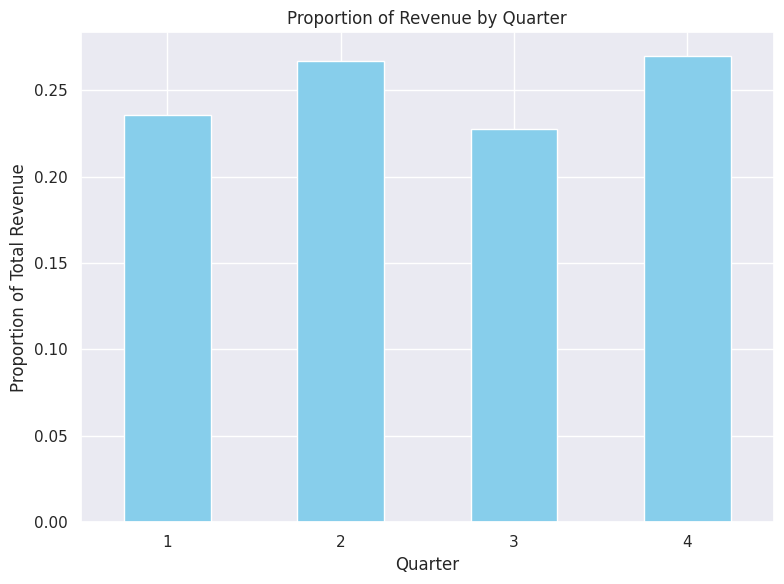

In [ ]:
# Calculate proportion of each quarter
# Ensure 'tpep_pickup_datetime' is in datetime format
new_data['tpep_pickup_datetime'] = pd.to_datetime(new_data['tpep_pickup_datetime'])

# Extract the quarter (1: Q1, 2: Q2, 3: Q3, 4: Q4)
new_data['quarter'] = new_data['tpep_pickup_datetime'].dt.quarter

# Group by quarter and calculate total revenue (sum of 'total_amount')
quarterly_revenue = new_data.groupby('quarter')['total_amount'].sum()

# Calculate the total revenue for the year
total_revenue = quarterly_revenue.sum()

# Calculate the proportion of each quarter
quarterly_proportion = quarterly_revenue / total_revenue

# Display the proportion of each quarter
print(quarterly_proportion)

# Plot the proportion of each quarter
plt.figure(figsize=(8,6))
quarterly_proportion.plot(kind='bar', color='skyblue')
plt.title("Proportion of Revenue by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Proportion of Total Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance
# Filter out trips with trip_distance = 0
df1_filtered = new_data[new_data['trip_distance'] > 0]

# Scatter plot to visualize the relationship between trip_distance and fare_amount
plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df1_filtered, alpha=0.5, color='blue')
plt.title("Relationship between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient between trip_distance and fare_amount
correlation = df1_filtered['trip_distance'].corr(df1_filtered['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")



Correlation between trip_distance and fare_amount: 0.9269


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare and trip duration: 0.27


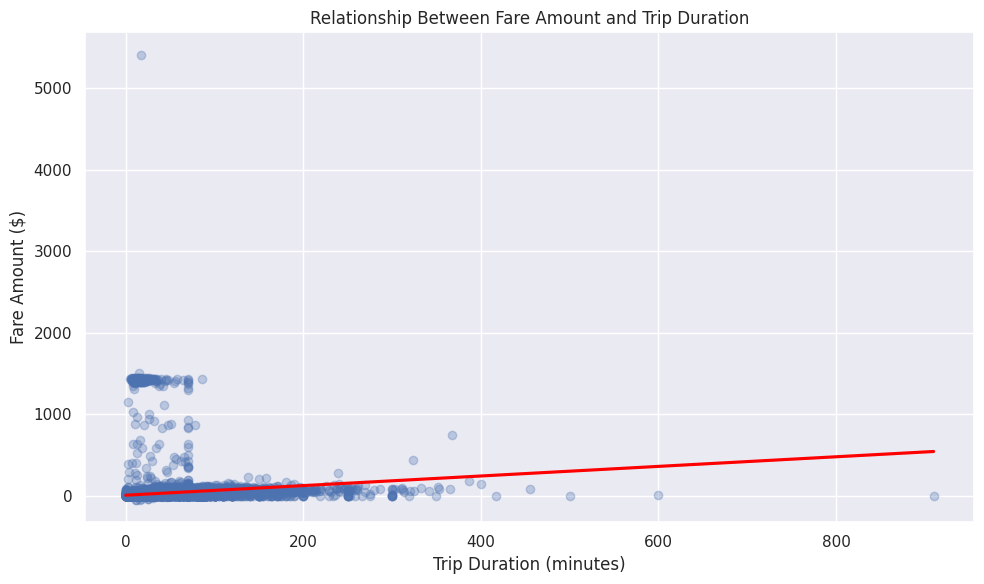

In [ ]:
# Show relationship between fare and trip duration

# Convert to datetime if not already
df['tpep_pickup_datetime'] = pd.to_datetime(new_data['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(new_data['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
new_data['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter out extreme outliers (e.g., trips > 120 minutes or fare > $200)
#filtered_df = new_data[(new_data['trip_duration'] > 0) & (new_data['trip_duration'] <= 3600) &
 #               (new_data['fare_amount'] > 0) & (new_data['fare_amount'] <= 200)]
correlation = new_data['fare_amount'].corr(new_data['trip_duration'])
print(f"Correlation between fare and trip duration: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(data=new_data, x='fare_amount', y='trip_duration', scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Relationship Between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

#print(new_data['trip_duration'].describe())



In [ ]:
new_data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour',
 'Airport_fee',
 'combined_airport_fee',
 'pickup_day',
 'pickup_day_name',
 'pickup_month',
 'quarter',
 'trip_duration']

In [ ]:
# Show relationship between fare and number of passengers

filtered_df = new_data[(new_data['fare_amount'] > 0) & (new_data['fare_amount'] < 200) & (new_data['passenger_count'] > 0)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='passenger_count', y='fare_amount', showfliers=False, palette='coolwarm')

plt.title('Fare Amount by Passenger Count (Filtered)')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


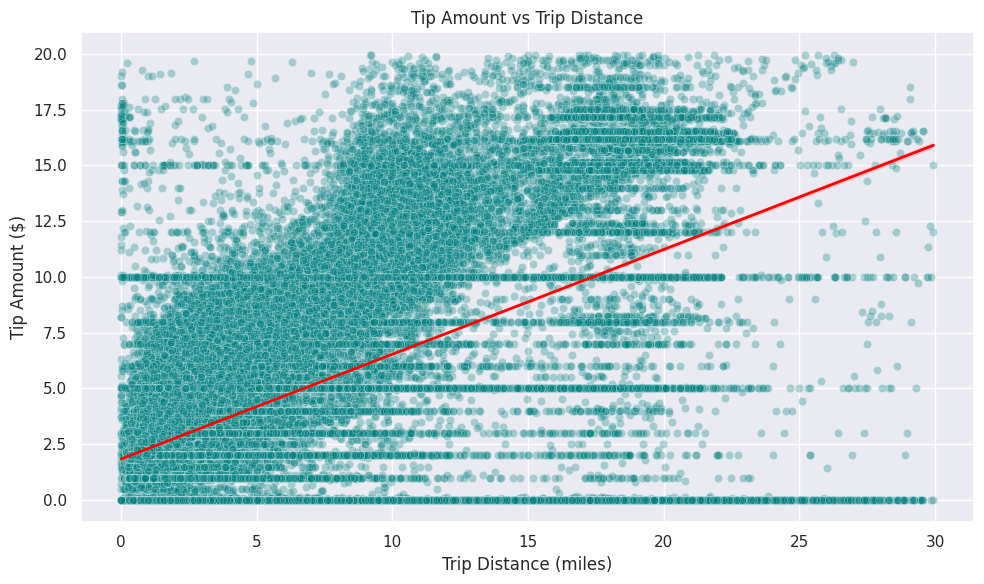

In [ ]:
# Show relationship between tip and trip distance

# Filter data to remove extreme outliers for a clearer plot
filtered_df = new_data[(new_data['trip_distance'] > 0) & (new_data['trip_distance'] < 30) &
                 (new_data['tip_amount'] >= 0) & (new_data['tip_amount'] < 20)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='trip_distance', y='tip_amount', alpha=0.3, color='teal')
sns.regplot(data=filtered_df, x='trip_distance', y='tip_amount', scatter=False, color='red', line_kws={'linewidth':2})

plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

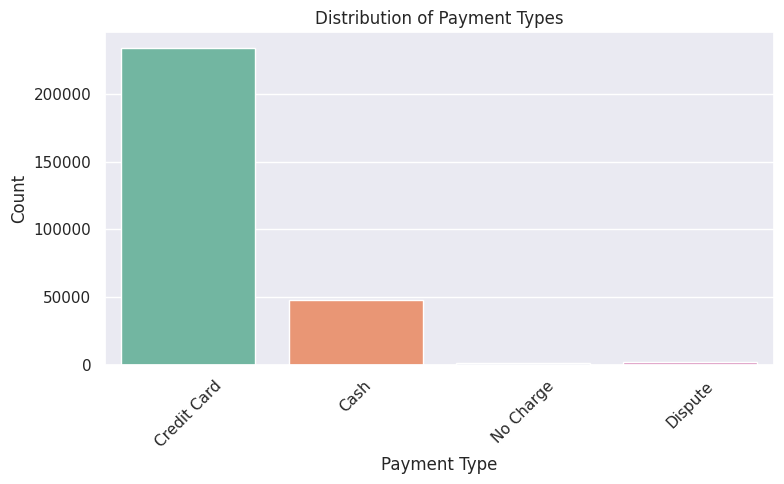

payment_type
1.0    233474
2.0     47681
3.0      1297
4.0      2040
Name: count, dtype: int64


In [ ]:
# Analyse the distribution of different payment types (payment_type).

new_data['payment_type'].unique()

# Set figure size
plt.figure(figsize=(8, 5))

# Plot distribution of payment types
sns.countplot(data=new_data, x='payment_type', palette='Set2')

# Set titles and labels
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Credit Card', 'Cash', 'No Charge', 'Dispute'], rotation=45)

plt.tight_layout()
plt.show()
# Show count of records per payment type
payment_type_counts = new_data['payment_type'].value_counts().sort_index()
print(payment_type_counts)


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas
!apt-get install -y python3-gdal

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-gdal is already the newest version (3.6.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
from google.colab import files

uploaded = files.upload()
import zipfile
import os

zip_path = 'taxi_zones.zip'  # replace with your uploaded filename
extract_dir = 'taxi_zones'   # where to extract

# Create the folder if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
import geopandas as gpd

# Find the .shp file path
shp_path = os.path.join(extract_dir, 'taxi_zones.shp')  # update name if different

# Load into GeoDataFrame
taxi_zones = gpd.read_file(shp_path)

# Preview the data
taxi_zones.head()


Saving taxi_zones.zip to taxi_zones (2).zip


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
print(taxi_zones.info())
taxi_zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
taxi_zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'trip_count'],
      dtype='object')

In [ ]:
# Merge zones and trip records using locationID and PULocationID
merge_zones_trip = pd.merge(
    new_data,
    taxi_zones,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)
merge_zones_trip

NameError: name 'pd' is not defined

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

total_trip_counts = merge_zones_trip.groupby('LocationID').size().reset_index(name='trip_count')
total_trip_counts

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
merge_zones_trip.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'Airport_fee', 'combined_airport_fee', 'pickup_day', 'pickup_day_name',
       'pickup_month', 'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'pickup_hour', 'pickup_datetime', 'day_of_week', 'hour_of_day',
       'day_type', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'pickup_day_of_week', 'distance_tier',
       'tip_percentage', 'distance_bin', 'pickup_dayofweek',
       'avg_passenger_count_x', 'avg_passenger_count_y'],
      dtype='object')

In [ ]:
# Count trips per pickup location

pickup_zone_counts = merge_zones_trip.groupby('zone').size().reset_index(name='trip_count')
pickup_zone_counts


zone  trip_count
0    Allerton/Pelham Gardens           8
1              Alphabet City         315
2              Arden Heights           1
3    Arrochar/Fort Wadsworth           3
4                    Astoria         133
..                       ...         ...
231       Woodlawn/Wakefield           4
232                 Woodside          43
233       World Trade Center        1473
234           Yorkville East        3687
235           Yorkville West        5385

[236 rows x 2 columns]

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

# Count trips per pickup location
pickup_zone_counts = merge_zones_trip.groupby('zone').size().reset_index(name='trip_count')

# Merge trip counts back to the zones GeoDataFrame
zones_with_counts = pd.merge(taxi_zones, pickup_zone_counts, on='zone', how='left')

# Ensure 'trip_count' column exists and is filled
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0).astype(int)

zones_with_counts['trip_count']

# Merge 'trip_count' from zones_with_counts to taxi_zones
taxi_zones = pd.merge(taxi_zones, zones_with_counts[['LocationID', 'trip_count']], on='LocationID', how='left')

# Ensure 'trip_count' is filled for any unmatched zones
taxi_zones['trip_count'] = taxi_zones['trip_count'].fillna(0).astype(int)

taxi_zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0           5  
1           0  
2           8  
3         315  
4           1

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

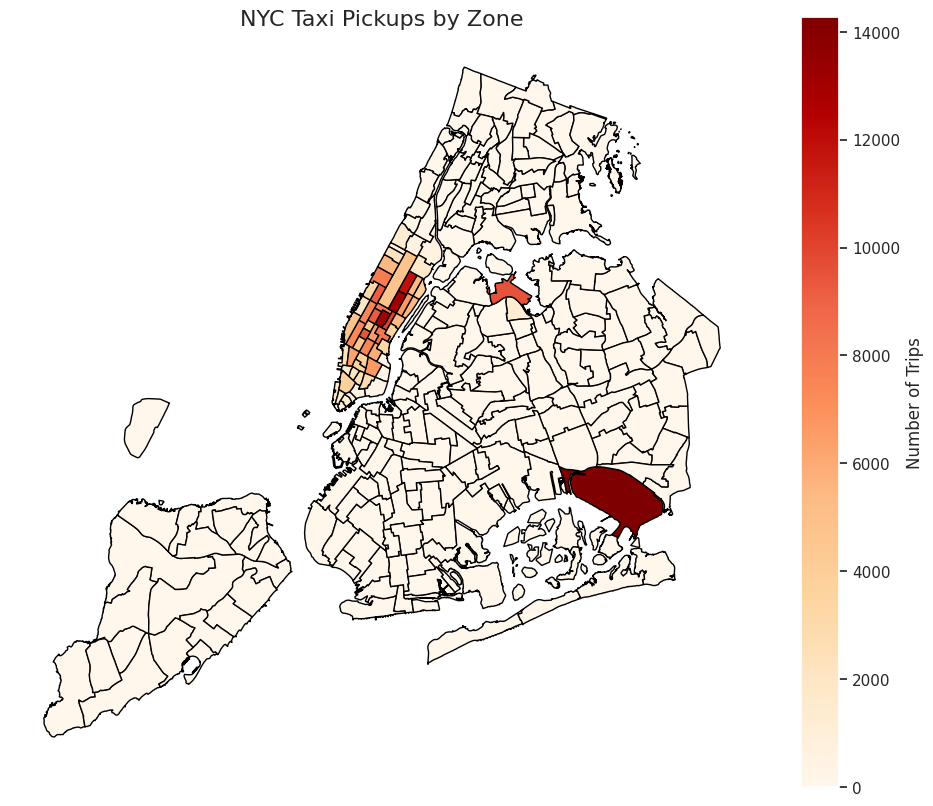

In [ ]:
# Define figure and axis
# Plot the map and display it
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the zones with trip counts
zones_with_counts.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    cmap='OrRd',
    edgecolor='black',
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"}
)

# Add title and clean up axes
ax.set_title("NYC Taxi Pickups by Zone", fontsize=16)
ax.axis('off')  # Hide x and y axis

# Display the plot
plt.show()




In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the GeoDataFrame by trip_count in descending order
sorted_zones = zones_with_counts.sort_values(by='trip_count', ascending=False)

# Display top 10 zones
sorted_zones[['zone', 'borough', 'trip_count']].head(10)



zone    borough  trip_count
131                   JFK Airport     Queens       14274
236         Upper East Side South  Manhattan       13125
160                Midtown Center  Manhattan       12977
235         Upper East Side North  Manhattan       11834
161                  Midtown East  Manhattan       10038
137             LaGuardia Airport     Queens        9524
185  Penn Station/Madison Sq West  Manhattan        9431
229     Times Sq/Theatre District  Manhattan        9272
141           Lincoln Square East  Manhattan        9162
169                   Murray Hill  Manhattan        8213

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

       pickup_hour  PULocationID  DOLocationID       speed
12612            0          88.0         144.0    0.001249
7797             1          68.0         226.0  -96.266667
47259            2         229.0         137.0    0.002726
33428            3         148.0         238.0    0.004224
48227            4         230.0          51.0    0.011963
49136            5         230.0         230.0    0.006085
63826            6         265.0          65.0 -345.800000
19983            7         128.0         128.0    0.001923
5573             8          50.0          43.0    0.000992
30214            9         142.0         232.0    0.004754
63855           10         265.0         140.0 -200.000000
46142           11         213.0          32.0   -0.225235
38596           12         163.0         107.0    0.006815
63888           13         265.0         263.0   -5.752941
63827           14         265.0          65.0   -7.320000
23508           15         134.0         265.0    0.0012

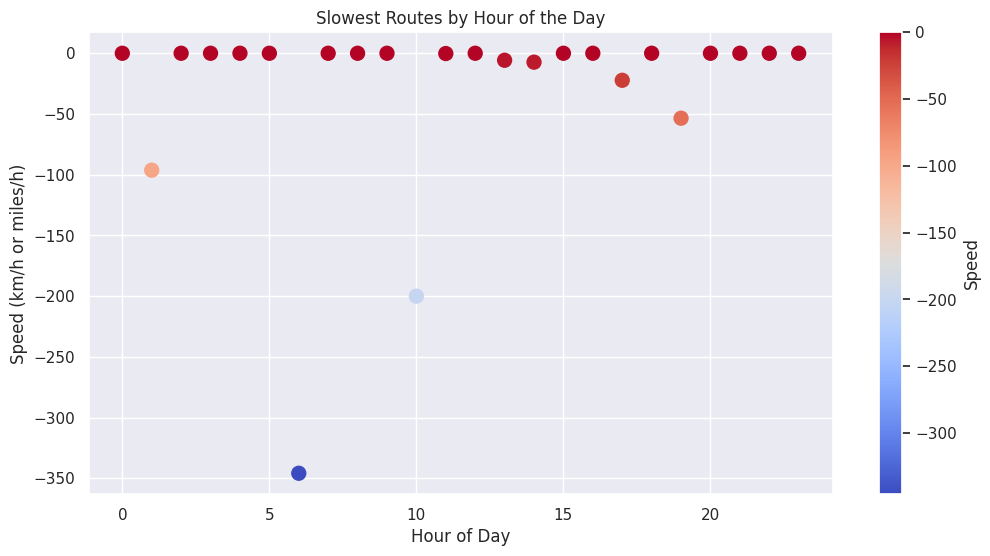

In [ ]:
# Find routes which have the slowest speeds at different times of the day


merge_zones_trip['tpep_pickup_datetime'] = pd.to_datetime(merge_zones_trip['tpep_pickup_datetime'])
merge_zones_trip['tpep_dropoff_datetime'] = pd.to_datetime(merge_zones_trip['tpep_dropoff_datetime'])

# Calculate trip duration in minutes using 'df' (since the required columns are there)
merge_zones_trip['trip_duration'] = (merge_zones_trip['tpep_dropoff_datetime'] - merge_zones_trip['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

# Extract the hour of the day from pickup_datetime
merge_zones_trip['pickup_hour'] = merge_zones_trip['tpep_pickup_datetime'].dt.hour

# Group by pickup and drop-off locations, and pickup hour
route_stats = merge_zones_trip.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])[['trip_duration', 'trip_distance']].agg({
    'trip_duration': 'mean',
    'trip_distance': 'mean'
}).reset_index()
route_stats['speed'] = route_stats['trip_distance'] / route_stats['trip_duration']  # Speed = Distance / Duration

# Find the slowest route for each hour of the day
slow_routes = route_stats.sort_values(by=['pickup_hour', 'speed']).groupby('pickup_hour').head(1)

# Display slowest routes
print(slow_routes[['pickup_hour', 'PULocationID', 'DOLocationID', 'speed']])

# Plot slowest routes by hour
plt.figure(figsize=(12, 6))
plt.scatter(slow_routes['pickup_hour'], slow_routes['speed'], c=slow_routes['speed'], cmap='coolwarm', s=100)
plt.title('Slowest Routes by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Speed (km/h or miles/h)')
plt.colorbar(label='Speed')
plt.grid(True)
plt.show()



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour


merge_zones_trip['pickup_hour'] = merge_zones_trip['tpep_pickup_datetime'].dt.hour  # Extract hour of the day

# Calculate number of trips per hour
hourly_trip_counts = merge_zones_trip.groupby('pickup_hour').size()

# Find the busiest hour (hour with the highest number of trips)
busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_trip_count = hourly_trip_counts.max()

# Print the busiest hour and the number of trips for that hour
print(f"Busiest hour: {busiest_hour} with {busiest_hour_trip_count} trips")

# Visualize the number of trips per hour
plt.figure(figsize=(12, 6))
hourly_trip_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Taxi Trips Per Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()



Busiest hour: 18 with 19697 trips


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

# 1. Calculate number of trips per hour
hourly_trip_counts = merge_zones_trip.groupby('pickup_hour').size()

# 2. Find the five busiest hours
top_5_busiest_hours = hourly_trip_counts.nlargest(5)

# 3. Calculate the total number of trips in the dataset
total_trips = len(df)

# 4. Get the total number of trips in the sampled data (for example, if we have a sampled dataset, we can use the count of that)
# Here, we assume the sampled data is the one we've been working with (df). If you have a specific sampled dataset, replace `len(df)` with that.

sampled_trips = total_trips  # Number of trips in the sampled data (replace with sampled count if different)

# 5. Calculate the sampling fraction
sampling_fraction = total_trips / sampled_trips

# 6. Scale up the number of trips for the five busiest hours
scaled_up_trips = top_5_busiest_hours * sampling_fraction

# 7. Display the actual number of trips and the scaled-up trips
print("Top 5 Busiest Hours and Number of Trips:")
print(top_5_busiest_hours)

print("\nScaled-Up Number of Trips for the Five Busiest Hours:")
print(scaled_up_trips)




Top 5 Busiest Hours and Number of Trips:
pickup_hour
18    19697
17    18795
19    17635
16    17297
15    17291
dtype: int64

Scaled-Up Number of Trips for the Five Busiest Hours:
pickup_hour
18    19697.0
17    18795.0
19    17635.0
16    17297.0
15    17291.0
dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends

merge_zones_trip['pickup_datetime'] = pd.to_datetime(merge_zones_trip['tpep_pickup_datetime'])
merge_zones_trip['day_of_week'] = merge_zones_trip['tpep_pickup_datetime'].dt.dayofweek  # Monday = 0, Sunday = 6
merge_zones_trip['hour_of_day'] = merge_zones_trip['tpep_pickup_datetime'].dt.hour
merge_zones_trip['day_type'] = merge_zones_trip['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
hourly_counts = merge_zones_trip.groupby(['day_type', 'hour_of_day']).size().reset_index(name='num_trips')
hourly_counts

day_type  hour_of_day  num_trips
0   Weekday            0       3886
1   Weekday            1       1980
2   Weekday            2       1069
3   Weekday            3        674
4   Weekday            4        652
5   Weekday            5       1226
6   Weekday            6       3215
7   Weekday            7       6642
8   Weekday            8       9028
9   Weekday            9       9571
10  Weekday           10       9776
11  Weekday           11      10287
12  Weekday           12      10978
13  Weekday           13      11326
14  Weekday           14      12382
15  Weekday           15      12718
16  Weekday           16      12643
17  Weekday           17      14062
18  Weekday           18      15007
19  Weekday           19      13248
20  Weekday           20      11906
21  Weekday           21      11942
22  Weekday           22      10832
23  Weekday           23       8130
24  Weekend            0       3933
25  Weekend            1       3269
26  Weekend            2       2361
27  Weekend            3       1580
28  Weekend            4        827
29  Weekend            5        385
30  Weekend            6        619
31  Weekend            7        954
32  Weekend            8       1515
33  Weekend            9       2387
34  Weekend           10       3206
35  Weekend           11       3774
36  Weekend           12       4283
37  Weekend           13       4432
38  Weekend           14       4514
39  Weekend           15       4573
40  Weekend           16       4654
41  Weekend           17       4733
42  Weekend           18       4690
43  Weekend           19       4387
44  Weekend           20       3829
45  Weekend           21       3749
46  Weekend           22       3675
47  Weekend           23       3322

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

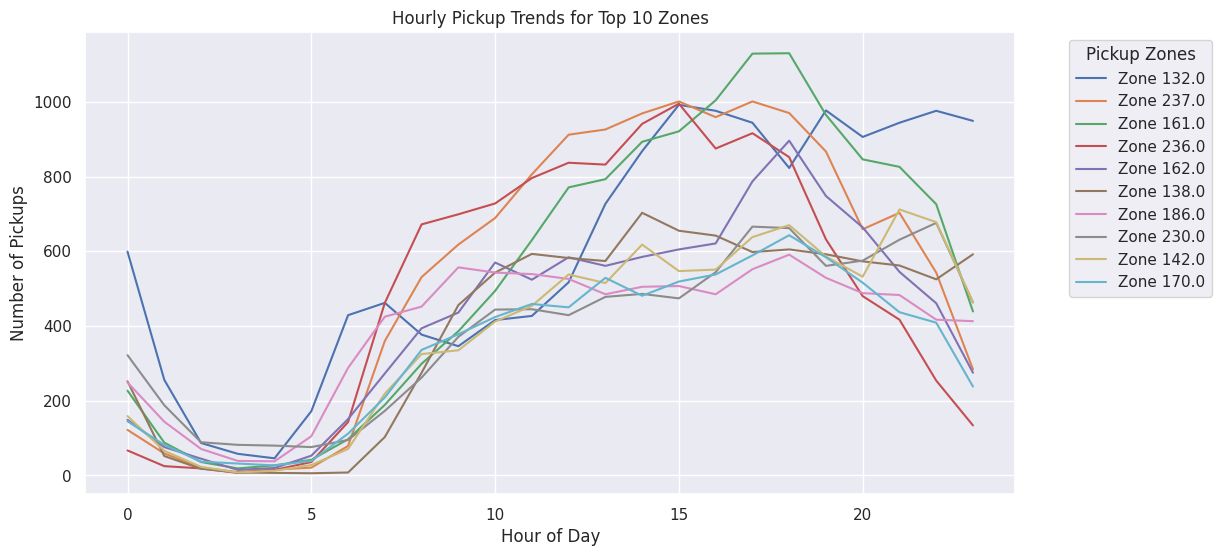

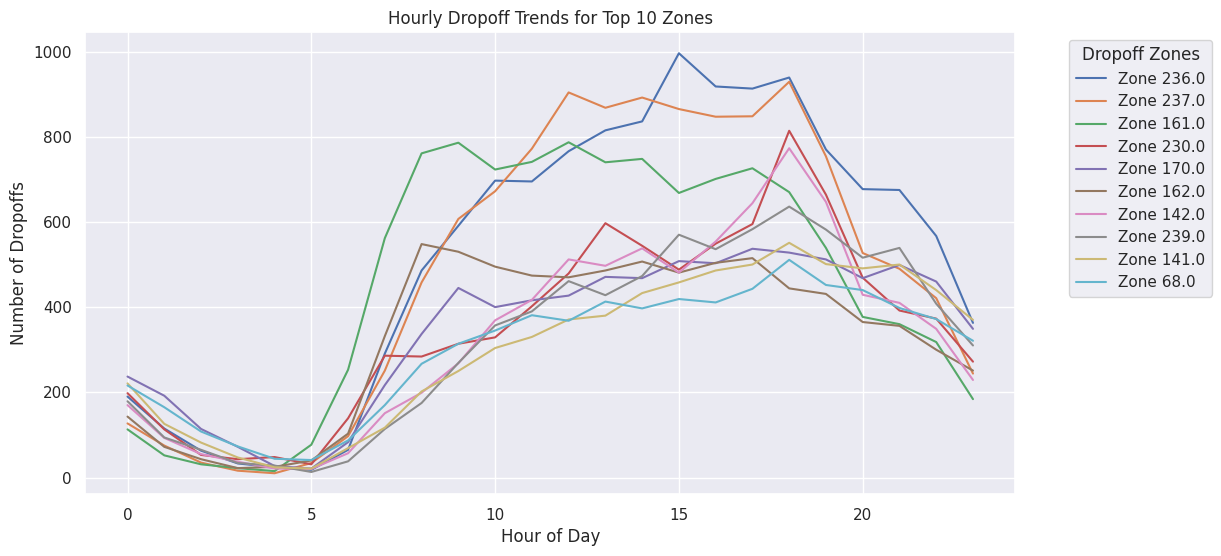

In [ ]:
# Find top 10 pickup and dropoff zones
# Assuming 'merge_zones_trip' is your DataFrame and has 'pickup_datetime', 'dropoff_datetime', 'PULocationID', and 'DOLocationID'

# Step 1: Extract the hour from pickup and dropoff datetimes
merge_zones_trip['pickup_hour'] = merge_zones_trip['tpep_pickup_datetime'].dt.hour
merge_zones_trip['dropoff_hour'] = merge_zones_trip['tpep_dropoff_datetime'].dt.hour

# Step 2: Calculate the number of pickups and dropoffs per zone for each hour

# Count pickups per zone and hour
#pickup_counts = merge_zones_trip.groupby(['PULocationID', 'pickup_hour']).size()
pickup_counts = merge_zones_trip.groupby(['PULocationID', 'pickup_hour'])['pickup_hour'].count().unstack(fill_value=0)

# Count dropoffs per zone and hour
#dropoff_counts = merge_zones_trip.groupby(['DOLocationID', 'dropoff_hour']).size()
dropoff_counts = merge_zones_trip.groupby(['DOLocationID', 'dropoff_hour'])['dropoff_hour'].count().unstack(fill_value=0)

# Step 3: Find the top 10 zones with high hourly pickups
#top_10_pickup_zones = pickup_counts.groupby('PULocationID').sum().nlargest(10).index
top_10_pickup_zones = pickup_counts.sum(axis=1).sort_values(ascending=False).head(10).index

# Find the top 10 zones with high hourly dropoffs
#top_10_dropoff_zones = dropoff_counts.groupby('DOLocationID').sum().nlargest(10).index
top_10_dropoff_zones = dropoff_counts.sum(axis=1).sort_values(ascending=False).head(10).index

# Step 4: Visualize pickup and dropoff trends for the top 10 zones

# Plot pickup trends for the top 10 zones
plt.figure(figsize=(12, 6))
for zone in top_10_pickup_zones:
    #zone_data = pickup_counts.loc[zone].unstack(level=0).fillna(0)  # Unstack with level=0
    zone_data = pickup_counts.loc[zone]
    plt.plot(zone_data.index, zone_data.values, label=f'Zone {zone}')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title="Pickup Zones", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plot dropoff trends for the top 10 zones
plt.figure(figsize=(12, 6))
for zone in top_10_dropoff_zones:
    #zone_data = dropoff_counts.loc[zone].unstack(level=0).fillna(0)  # Unstack with level=0
    zone_data = dropoff_counts.loc[zone]
    plt.plot(zone_data.index, zone_data.values, label=f'Zone {zone}')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend(title="Dropoff Zones", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



# Step 1: Calculate total pickups and dropoffs for each zone
pickup_counts = merge_zones_trip.groupby('PULocationID').size()
dropoff_counts = merge_zones_trip.groupby('DOLocationID').size()

# Step 2: Calculate the ratio of pickups to dropoffs for each zone
# To avoid division by zero, we can use a try-except or add small constant values if necessary
pickup_dropoff_ratio = pickup_counts / dropoff_counts

# Step 3: Find the top 10 highest pickup/dropoff ratios and the bottom 10
top_10_ratio = pickup_dropoff_ratio.nlargest(10)
bottom_10_ratio = pickup_dropoff_ratio.nsmallest(10)

# Step 4: Display the top 10 and bottom 10 ratios
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratio)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratio)


Top 10 Pickup/Dropoff Ratios:
70.0     8.652778
132.0    4.601547
138.0    2.665547
186.0    1.506790
249.0    1.378444
43.0     1.373000
114.0    1.356879
162.0    1.264710
161.0    1.184681
100.0    1.179963
dtype: float64

Bottom 10 Pickup/Dropoff Ratios:
1.0      0.006158
257.0    0.033898
252.0    0.035714
192.0    0.040000
101.0    0.045455
178.0    0.047619
102.0    0.051724
16.0     0.052632
200.0    0.053763
202.0    0.056250
dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

import pandas as pd


# Step 1: Extract the hour from the pickup and dropoff datetime columns
merge_zones_trip['pickup_hour'] = merge_zones_trip['tpep_pickup_datetime'].dt.hour
merge_zones_trip['dropoff_hour'] = merge_zones_trip['tpep_dropoff_datetime'].dt.hour

# Step 2: Filter the data to include only trips during night hours (11 PM to 5 AM)
night_hours_df = merge_zones_trip[(merge_zones_trip['pickup_hour'] >= 23) | (merge_zones_trip['pickup_hour'] <= 5) | (merge_zones_trip['dropoff_hour'] >= 23) | (merge_zones_trip['dropoff_hour'] <= 5)]

# Step 3: Count the number of pickups and dropoffs per zone during night hours
night_pickup_counts = night_hours_df.groupby('PULocationID').size()
night_dropoff_counts = night_hours_df.groupby('DOLocationID').size()

# Step 4: Find the top 10 zones with high pickup and dropoff traffic during night hours
top_10_night_pickup_zones = night_pickup_counts.nlargest(10)
top_10_night_dropoff_zones = night_dropoff_counts.nlargest(10)

# Step 5: Display the top 10 pickup and dropoff zones during night hours
print("Top 10 Pickup Zones During Night Hours (11 PM - 5 AM):")
print(top_10_night_pickup_zones)

print("\nTop 10 Dropoff Zones During Night Hours (11 PM - 5 AM):")
print(top_10_night_dropoff_zones)



Top 10 Pickup Zones During Night Hours (11 PM - 5 AM):
PULocationID
132.0    2737
79.0     2543
249.0    2094
48.0     1709
148.0    1568
230.0    1449
114.0    1387
186.0    1162
138.0    1130
164.0    1015
dtype: int64

Top 10 Dropoff Zones During Night Hours (11 PM - 5 AM):
DOLocationID
79.0     1381
48.0     1159
170.0    1020
68.0      973
107.0     947
141.0     896
263.0     882
236.0     813
249.0     774
230.0     767
dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)


# Step 1: Extract hour from the pickup time
merge_zones_trip['pickup_hour'] = merge_zones_trip['tpep_pickup_datetime'].dt.hour

# Step 2: Filter for nighttime and daytime hours
night_hours_df = merge_zones_trip[(merge_zones_trip['pickup_hour'] >= 23) | (merge_zones_trip['pickup_hour'] <= 5)]  # 11 PM to 5 AM
day_hours_df = merge_zones_trip[(merge_zones_trip['pickup_hour'] >= 6) & (merge_zones_trip['pickup_hour'] <= 22)]  # 6 AM to 10 PM

# Step 3: Calculate the revenue for each trip (sum of fare_amount and tip_amount)
night_hours_df['revenue'] = night_hours_df['fare_amount'] + night_hours_df['tip_amount']
day_hours_df['revenue'] = day_hours_df['fare_amount'] + day_hours_df['tip_amount']

# Step 4: Calculate the total revenue for nighttime and daytime
total_night_revenue = night_hours_df['revenue'].sum()
total_day_revenue = day_hours_df['revenue'].sum()

# Step 5: Calculate the overall total revenue
total_revenue = merge_zones_trip['fare_amount'].sum() + merge_zones_trip['tip_amount'].sum()

# Step 6: Calculate the revenue share for nighttime and daytime hours
night_revenue_share = total_night_revenue / total_revenue * 100
day_revenue_share = total_day_revenue / total_revenue * 100

# Step 7: Display the results
print(f"Total Night Revenue: ${total_night_revenue:.2f}")
print(f"Total Day Revenue: ${total_day_revenue:.2f}")
print(f"Nighttime Revenue Share: {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_revenue_share:.2f}%")




Total Night Revenue: $796893.07
Total Day Revenue: $5687977.87
Nighttime Revenue Share: 12.29%
Daytime Revenue Share: 87.71%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts


# Step 1: Calculate the fare per mile for each trip
merge_zones_trip['fare_per_mile'] = merge_zones_trip['fare_amount'] / merge_zones_trip['trip_distance']

# Step 2: Calculate the fare per mile per passenger
merge_zones_trip['fare_per_mile_per_passenger'] = merge_zones_trip['fare_per_mile'] / merge_zones_trip['passenger_count']

# Step 3: Group by passenger count and calculate the average fare per mile per passenger
avg_fare_per_mile_per_passenger = merge_zones_trip.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

# Step 4: Display the results
print("Average Fare Per Mile Per Passenger for Different Passenger Counts:")
print(avg_fare_per_mile_per_passenger)




Average Fare Per Mile Per Passenger for Different Passenger Counts:
passenger_count
0.0          inf
1.0    10.744238
2.0     6.309661
3.0     4.287937
4.0     4.977417
5.0     1.582083
6.0     1.283236
8.0     0.350442
9.0     0.595593
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



import pandas as pd

# Assuming 'merge_zones_trip' is your DataFrame

# 1. Data Preparation:
#    - Filter out rows with zero or negative trip distance to avoid division by zero errors.
merge_zones_trip = merge_zones_trip[(merge_zones_trip['trip_distance'] > 0) & (merge_zones_trip['fare_amount'] > 0)]

# 2. Calculate Fare per Mile:
merge_zones_trip['fare_per_mile'] = merge_zones_trip['fare_amount'] / merge_zones_trip['trip_distance']

# 3. Extract Hour of Day and Day of Week:
merge_zones_trip['pickup_hour'] = merge_zones_trip['tpep_pickup_datetime'].dt.hour
merge_zones_trip['pickup_day_of_week'] = merge_zones_trip['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# 4. Calculate Average Fare per Mile:
#    - Group by hour of the day
avg_fare_by_hour = merge_zones_trip.groupby('pickup_hour')['fare_per_mile'].mean()

#    - Group by day of the week
avg_fare_by_day = merge_zones_trip.groupby('pickup_day_of_week')['fare_per_mile'].mean()

# 5. Display Results:
print("Average Fare Per Mile by Hour of the Day:")
print(avg_fare_by_hour)

print("\nAverage Fare Per Mile by Day of the Week:")
print(avg_fare_by_day)






Average Fare Per Mile by Hour of the Day:
pickup_hour
0     11.772595
1     14.862131
2      8.875707
3      9.997160
4     18.239001
5     11.524357
6     12.303497
7      8.553694
8      9.757946
9     10.293768
10    10.397227
11    10.955922
12    11.543204
13    12.544307
14    12.203947
15    11.189074
16    13.914100
17    11.948617
18    10.214976
19    11.642249
20     9.553606
21     9.289516
22    11.849073
23     9.684598
Name: fare_per_mile, dtype: float64

Average Fare Per Mile by Day of the Week:
pickup_day_of_week
0    10.237221
1    11.201124
2    11.367889
3    12.432238
4     9.907088
5    11.228025
6    11.817236
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors


# Step 1: Remove rows where trip_distance is zero or NaN
merge_zones_trip = merge_zones_trip[merge_zones_trip['trip_distance'] > 0]  # Filter out trips with 0 or negative distances

# Step 2: Extract hour of the day from the pickup datetime
merge_zones_trip['pickup_hour'] = merge_zones_trip['tpep_pickup_datetime'].dt.hour

# Step 3: Calculate the fare per mile for each trip
merge_zones_trip['fare_per_mile'] = merge_zones_trip['fare_amount'] / merge_zones_trip['trip_distance']

# Step 4: Group by vendor_id and pickup_hour, calculate the average fare per mile
avg_fare_per_mile_vendor_hour = merge_zones_trip.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().unstack()

# Step 5: Display the results in a tabular form
print("Average Fare Per Mile for Different Vendors and Hours of the Day:")
print(avg_fare_per_mile_vendor_hour)





Average Fare Per Mile for Different Vendors and Hours of the Day:
pickup_hour         0          1         2          3          4          5   \
VendorID                                                                       
1.0           6.595112   7.148700  7.094670   6.410625   6.062375   6.732950   
2.0          13.264003  16.935454  9.395595  11.009061  21.763535  13.431339   
6.0           4.546903        NaN       NaN        NaN        NaN   3.987065   

pickup_hour         6         7          8          9   ...         14  \
VendorID                                                ...              
1.0           6.560513  7.237087   8.165518   8.108613  ...   8.805668   
2.0          14.653917  9.109326  10.389097  11.138188  ...  13.468069   
6.0           2.838374  3.215158   5.623722        NaN  ...   5.872492   

pickup_hour         15         16         17         18         19         20  \
VendorID                                                                        


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers


# Step 1: Clean data
merge_zones_trip = merge_zones_trip[(merge_zones_trip['fare_amount'] > 0) & (merge_zones_trip['trip_distance'] > 0)]

# Step 2: Define distance tiers
def get_distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

merge_zones_trip['distance_tier'] = merge_zones_trip['trip_distance'].apply(get_distance_tier)

# Step 3: Calculate fare per mile
merge_zones_trip['fare_per_mile'] = merge_zones_trip['fare_amount'] / merge_zones_trip['trip_distance']

# Step 4: Group by vendor and tier
tiered_fares = merge_zones_trip.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
tiered_fares



VendorID distance_tier  fare_per_mile
0       1.0     0-2 miles       9.761823
1       1.0     2-5 miles       6.380714
2       1.0      5+ miles       4.414204
3       2.0     0-2 miles      17.931570
4       2.0     2-5 miles       6.531769
5       2.0      5+ miles       4.488624
6       6.0     0-2 miles      30.158730
7       6.0     2-5 miles       7.002849
8       6.0      5+ miles       4.049680

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Avoid division by zero
merge_zones_trip = merge_zones_trip[merge_zones_trip['fare_amount'] > 0]
merge_zones_trip['tip_percentage'] = (merge_zones_trip['tip_amount'] / merge_zones_trip['fare_amount']) * 100
def distance_bin(d):
    if d <= 1:
        return '0–1 mi'
    elif d <= 3:
        return '1–3 mi'
    elif d <= 5:
        return '3–5 mi'
    else:
        return '5+ mi'

merge_zones_trip['distance_bin'] = merge_zones_trip['trip_distance'].apply(distance_bin)

# Group and analyze
distance_tips = merge_zones_trip.groupby('distance_bin')['tip_percentage'].mean().sort_index()
passenger_tips = merge_zones_trip.groupby('passenger_count')['tip_percentage'].mean()
merge_zones_trip['pickup_hour'] = merge_zones_trip['tpep_pickup_datetime'].dt.hour
hourly_tips = merge_zones_trip.groupby('pickup_hour')['tip_percentage'].mean()
hourly_tips

pickup_hour
0     20.374857
1     21.078467
2     20.052663
3     20.279602
4     17.347395
5     16.957838
6     19.154622
7     19.417248
8     19.862194
9     19.524247
10    19.234519
11    19.072845
12    19.157317
13    18.994662
14    19.267847
15    18.846840
16    21.013884
17    21.629344
18    22.051330
19    22.046074
20    21.224168
21    21.461536
22    21.415835
23    20.316031
Name: tip_percentage, dtype: float64

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
merge_zones_trip['tip_percentage'] = (merge_zones_trip['tip_amount'] / merge_zones_trip['fare_amount']) * 100

# Filter trips
low_tips = merge_zones_trip[merge_zones_trip['tip_percentage'] < 10]
high_tips = merge_zones_trip[merge_zones_trip['tip_percentage'] > 25]
print("Avg trip distance (low tips):", low_tips['trip_distance'].mean())
print("Avg trip distance (high tips):", high_tips['trip_distance'].mean())
print("Most common passenger count (low tips):")
print(low_tips['passenger_count'].value_counts(normalize=True).head())

print("Most common passenger count (high tips):")
print(high_tips['passenger_count'].value_counts(normalize=True).head())
low_tips['pickup_hour'] = low_tips['pickup_datetime'].dt.hour
high_tips['pickup_hour'] = high_tips['pickup_datetime'].dt.hour
low_tips['pickup_hour'] = low_tips['pickup_datetime'].dt.hour
high_tips['pickup_hour'] = high_tips['pickup_datetime'].dt.hour
low_tips['trip_duration'] = (low_tips['tpep_dropoff_datetime'] - low_tips['tpep_pickup_datetime']).dt.total_seconds() / 60
high_tips['trip_duration'] = (high_tips['tpep_dropoff_datetime'] - high_tips['tpep_pickup_datetime']).dt.total_seconds() / 60

print("Avg duration (low tips):", low_tips['trip_duration'].mean())
print("Avg duration (high tips):", high_tips['trip_duration'].mean())



Avg trip distance (low tips): 3.9255017874508624
Avg trip distance (high tips): 2.3062839864498867
Most common passenger count (low tips):
passenger_count
1.0    0.736923
2.0    0.154981
3.0    0.043323
4.0    0.028065
0.0    0.016560
Name: proportion, dtype: float64
Most common passenger count (high tips):
passenger_count
1.0    0.771411
2.0    0.140643
3.0    0.033843
4.0    0.017043
0.0    0.014941
Name: proportion, dtype: float64
Avg duration (low tips): 20.00707173088249
Avg duration (high tips): 12.651406215050113


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days
merge_zones_trip['pickup_hour'] = merge_zones_trip['tpep_pickup_datetime'].dt.hour
merge_zones_trip['pickup_dayofweek'] = merge_zones_trip['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
passenger_hour_day = merge_zones_trip.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().unstack()
passenger_hour_day



pickup_hour             0         1         2         3         4         5   \
pickup_dayofweek                                                               
0                 1.317949  1.438538  1.433962  1.508772  1.347458  1.220408   
1                 1.369115  1.450820  1.336000  1.350649  1.380000  1.255319   
2                 1.349138  1.380503  1.439759  1.514286  1.264151  1.199153   
3                 1.296296  1.391924  1.314159  1.300699  1.300000  1.238095   
4                 1.345455  1.343391  1.371501  1.382979  1.281915  1.267442   
5                 1.430281  1.448035  1.450997  1.408967  1.308311  1.266667   
6                 1.430134  1.461266  1.379967  1.398104  1.356828  1.375610   

pickup_hour             6         7         8         9   ...        14  \
pickup_dayofweek                                          ...             
0                 1.199670  1.217028  1.232065  1.290780  ...  1.362184   
1                 1.173716  1.236598  1.274143  1.257129  ...  1.334800   
2                 1.212481  1.229497  1.234289  1.242044  ...  1.330347   
3                 1.200297  1.211659  1.269623  1.276232  ...  1.348012   
4                 1.295000  1.281873  1.268088  1.312427  ...  1.371795   
5                 1.191223  1.307847  1.352217  1.365642  ...  1.424084   
6                 1.223333  1.301969  1.368421  1.422182  ...  1.467147   

pickup_hour             15        16        17        18        19        20  \
pickup_dayofweek                                                               
0                 1.388408  1.370563  1.320160  1.314152  1.349287  1.367654   
1                 1.340109  1.331635  1.291314  1.298424  1.286041  1.312756   
2                 1.320704  1.345343  1.314111  1.303315  1.301537  1.330030   
3                 1.350596  1.354778  1.321153  1.289563  1.330859  1.327818   
4                 1.388867  1.387674  1.379026  1.397029  1.414917  1.459038   
5                 1.476710  1.427699  1.462023  1.472664  1.487554  1.435445   
6                 1.482648  1.445657  1.442974  1.457603  1.462823  1.448555   

pickup_hour             21        22        23  
pickup_dayofweek                                
0                 1.363636  1.353448  1.354018  
1                 1.327803  1.368295  1.339324  
2                 1.349284  1.361193  1.351351  
3                 1.355067  1.389474  1.343882  
4                 1.485051  1.499790  1.503746  
5                 1.482856  1.507772  1.517361  
6                 1.425926  1.423841  1.425344  

[7 rows x 24 columns]

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
trips_with_zones = pd.merge(taxi_zones,merge_zones_trip, left_on='LocationID', right_on='PULocationID', how='left')
zone_passenger_stats = merge_zones_trip.groupby('zone')['passenger_count'].mean().sort_values(ascending=False)
print("Top 10 Zones by Avg. Passenger Count:")
print(zone_passenger_stats.head(10))

print("\nBottom 10 Zones by Avg. Passenger Count:")
print(zone_passenger_stats.tail(10))



Top 10 Zones by Avg. Passenger Count:
zone
Arrochar/Fort Wadsworth            2.000000
Highbridge Park                    2.000000
Newark Airport                     2.000000
Marine Park/Floyd Bennett Field    2.000000
Willets Point                      2.000000
Dyker Heights                      1.800000
Randalls Island                    1.750000
Red Hook                           1.739130
Battery Park                       1.716667
Oakland Gardens                    1.714286
Name: passenger_count, dtype: float64

Bottom 10 Zones by Avg. Passenger Count:
zone
Van Cortlandt Village            1.000000
Van Nest/Morris Park             1.000000
Windsor Terrace                  1.000000
Woodlawn/Wakefield               1.000000
West Farms/Bronx River           1.000000
Westchester Village/Unionport    1.000000
Woodhaven                        1.000000
Morrisania/Melrose               0.900000
Bronxdale                        0.857143
Borough Park                     0.857143
Name: passen

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_per_zone = merge_zones_trip.groupby('zone')['passenger_count'].mean().reset_index()
avg_passenger_per_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
merge_zones_trip= merge_zones_trip.merge(avg_passenger_per_zone, on='zone', how='left')
merge_zones_trip


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0            2.0  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1            2.0  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2            2.0  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3            2.0  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4            2.0  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
...          ...                  ...                   ...              ...   
278826       1.0  2023-12-31 23:33:13   2023-12-31 23:42:54              2.0   
278827       1.0  2023-12-31 23:20:56   2023-12-31 23:39:25              1.0   
278828       1.0  2023-12-31 23:43:52   2023-12-31 23:46:58              1.0   
278829       2.0  2023-12-31 23:34:33   2023-12-31 23:45:53              1.0   
278830       1.0  2023-12-31 23:01:21   2023-12-31 23:12:48              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                7.74         1.0                  N         138.0   
1                1.24         1.0                  N         161.0   
2                1.44         1.0                  N         237.0   
3                0.54         1.0                  N         143.0   
4               19.24         1.0                  N          66.0   
...               ...         ...                ...           ...   
278826           1.40         1.0                  N         233.0   
278827           3.90         1.0                  N         229.0   
278828           0.40         1.0                  N          68.0   
278829           2.54         1.0                  N         144.0   
278830           2.00         1.0                  N         107.0   

        DOLocationID  payment_type  ...  fare_per_mile  \
0              256.0           2.0  ...       4.186047   
1              237.0           1.0  ...       6.370968   
2              141.0           2.0  ...       7.916667   
3              142.0           2.0  ...      12.037037   
4              107.0           1.0  ...       1.332640   
...              ...           ...  ...            ...   
278826          43.0           1.0  ...       7.642857   
278827          90.0           1.0  ...       5.076923   
278828         158.0           1.0  ...      12.750000   
278829          12.0           1.0  ...       5.590551   
278830         229.0           1.0  ...       6.400000   

        fare_per_mile_per_passenger  pickup_day_of_week  distance_tier  \
0                          4.186047                   6       5+ miles   
1                          3.185484                   6      0-2 miles   
2                          2.638889                   6      0-2 miles   
3                         12.037037                   6      0-2 miles   
4                          1.332640                   6       5+ miles   
...                             ...                 ...            ...   
278826                     3.821429                   6      0-2 miles   
278827                     5.076923                   6      2-5 miles   
278828                    12.750000                   6      0-2 miles   
278829                     5.590551                   6      2-5 miles   
278830                     6.400000                   6      0-2 miles   

        tip_percentage  distance_bin  pickup_dayofweek  avg_passenger_count_x  \
0             0.000000         5+ mi                 6               1.353633   
1            32.658228        1–3 mi                 6               1.372043   
2             0.000000        1–3 mi                 6               1.310857   
3             0.000000        0–1 mi                 6               1.288787   
4            23.127925         5+ mi                 6               1.320000   
...                ...           ...               ...                    ...   
278826       36.448598        1–3 mi                 

Find out how often surcharges/extra charges are applied to understand their prevalance

In [ ]:
merge_zones_trip['extra'].value_counts()
extra_counts = merge_zones_trip['extra'].value_counts(normalize=True) * 100
extra_counts = extra_counts.rename_axis('Extra Charge ($)').reset_index(name='Percentage of Trips')
print(extra_counts)


    Extra Charge ($)  Percentage of Trips
0               0.00            39.078151
1               2.50            24.978571
2               1.00            19.462685
3               5.00             7.178542
4               3.50             5.723180
5               6.00             0.871854
6               7.50             0.848901
7               9.25             0.338556
8               4.25             0.333535
9               1.75             0.166768
10              3.75             0.144173
11              6.75             0.120144
12              2.75             0.114406
13              8.75             0.113689
14             10.25             0.084639
15              7.75             0.075673
16              1.25             0.074239
17             11.75             0.060969
18              2.25             0.052361
19              6.25             0.047341
20              9.75             0.029408
21             10.00             0.027257
22             11.25             0

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?

extra_freq = merge_zones_trip['extra'].value_counts().sort_index()
extra_percent = (extra_freq / len(df)) * 100

extra_summary = pd.DataFrame({
    'Extra Charge ($)': extra_freq.index,
    'Trip Count': extra_freq.values,
    'Percentage': extra_percent.values
}).sort_values(by='Extra Charge ($)')

print(extra_summary)
trips_with_zones = pd.merge(taxi_zones,merge_zones_trip, left_on='LocationID', right_on='PULocationID', how='left')
zone_extra_avg = merge_zones_trip.groupby('zone')['extra'].mean().sort_values(ascending=False)
print(zone_extra_avg.head(10))  # Zones with highest average surcharges
merge_zones_trip['pickup_hour'] = merge_zones_trip['tpep_pickup_datetime'].dt.hour
hourly_extra_avg = merge_zones_trip.groupby('pickup_hour')['extra'].mean()
hourly_extra_avg


    Extra Charge ($)  Trip Count  Percentage
0               0.00      108962   38.300550
1               0.50           2    0.000703
2               1.00       54268   19.075405
3               1.25         207    0.072761
4               1.75         465    0.163449
5               2.25         146    0.051320
6               2.45           2    0.000703
7               2.50       69648   24.481532
8               2.72           1    0.000352
9               2.75         319    0.112130
10              3.20           9    0.003164
11              3.25           2    0.000703
12              3.50       15958    5.609297
13              3.75         402    0.141305
14              4.25         930    0.326898
15              4.75           2    0.000703
16              5.00       20016    7.035699
17              5.25           4    0.001406
18              6.00        2431    0.854506
19              6.25         132    0.046398
20              6.75         335    0.117754
21        

pickup_hour
0     1.645850
1     1.506163
2     1.539067
3     1.543367
4     1.604429
5     1.730168
6     0.877478
7     0.885269
8     0.891302
9     0.949845
10    0.973906
11    0.973064
12    0.941157
13    0.955451
14    0.950891
15    0.948398
16    2.642163
17    2.699122
18    2.658199
19    2.620783
20    1.776279
21    1.721369
22    1.686732
23    1.763098
Name: extra, dtype: float64

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Recommendations for Optimizing Routing and Dispatching:



1.   Demand-based Dispatching:

  *   Use predictive algorithms to forecast taxi demand based on historical trends (time of day, day of week, location).

  *   Ensure that taxis are deployed to high-demand pickup zones (e.g., JFK, Times Square) during peak hours, with extra vehicles scheduled around night surcharges.


2.  Real-Time Traffic Monitoring:   

  *   Implement a dynamic rerouting system to avoid slow routes, particularly during rush hours. Utilize live traffic data to optimize routing and minimize delays.


  *   Predictive traffic models can also help in preemptively adjusting the taxi fleet's positioning based on expected traffic congestion.


3.  Price Optimization:
  
  *  Introduce variable pricing models during peak hours, weekends, and holidays, ensuring that surge pricing aligns with demand.


   *   Adjust fares dynamically based on distance, duration, and time of day to ensure cost-effectiveness and customer satisfaction.

4. Customer Experience Improvement:

  *  Provide real-time trip updates and
  better predictability for customers regarding trip fare and time of arrival, especially during high-traffic periods.

  *  Implement incentives for drivers to be more available during times of peak demand, such as weekend evenings, to ensure better coverage.

5.Data-Driven Routing:

  *  Invest in data analytics to continuously refine routing algorithms based on trip statistics like passenger count, surcharge application, and traffic patterns to achieve efficiency in operations.

   





   




















**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Strategic Cab Positioning Recommendations:**

1. Weekday Morning Rush (6 AM – 10 AM)
 High-Demand Zones:


  * Residential Zones: Upper East/West Side, Brooklyn (Williamsburg, Park Slope), Queens

  * Transport Hubs: Penn Station, Grand Central, Atlantic Terminal

 Strategy:
  * Position cabs in residential neighborhoods early to capture commuters heading to work.

  * Focus on first-mile connections to subway and train stations.

  * Deploy extra vehicles near schools and business districts by 9 AM.

2. Weekday Evening Rush (4 PM – 8 PM)
  High-Demand Zones:
  *  Business Districts: Midtown, Financial District, Downtown Brooklyn

  * Entertainment Areas: Times Square, SoHo, Chelsea

 Strategy:
Position cabs near office buildings and event venues.

 * Expect longer wait times and slower speeds – plan buffers.

 * Use staging areas outside heavy congestion zones for quick deployment.

3. Night Hours (8 PM – 2 AM, Especially Weekends)
 High-Demand Zones:
 * Nightlife Areas: East Village, Lower East Side, Meatpacking, Williamsburg

 * Transport Hubs: Airports (JFK, LaGuardia), Port Authority Bus Terminal

 Strategy:
Increase cab availability in entertainment and nightlife zones.

* Coordinate with airport terminals for expected arrival surges.

* Monitor zones with high tip percentages – better for driver incentive.

4. Weekend Daytime (10 AM – 6 PM)
 High-Demand Zones:
 * Tourist Areas: Central Park, Statue of Liberty Ferry, Museum Mile

 * Shopping Zones: SoHo, Fifth Avenue, Brooklyn Malls

 Strategy:
Target tourist destinations and shopping areas.

 * Weekend trips tend to be longer and higher fare – worth pre-positioning.

 * Allocate some drivers to standby near parks and attractions.

5. Airport and Hotel Strategy (All Day)
   High-Demand Zones:
   * JFK, LaGuardia, Newark

   * Midtown and Downtown Hotels

 Strategy:
Position cabs in rotating shifts at airports based on flight schedules.

  * Partner with hotels for designated taxi queues – particularly during check-out hours (7–11 AM).

6. Weather and Seasonal Adjustments
 Adjustments for:
 * Rain/Snow Days → Increase demand in residential and shopping areas

 * Holiday Season (Nov–Dec) → Focus on shopping and tourist districts

 Strategy:
Monitor weather forecasts to proactively dispatch drivers.

 * Offer peak-hour surge incentives to drivers in outer boroughs during bad weather.

 * Data-Driven Monitoring
Use real-time trip data to adjust positioning dynamically.

 * Feed back hourly demand data to constantly update zone-level driver density targets.

 * Maintain a minimum driver threshold in outer zones to avoid missed demand.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Data-Driven Pricing Strategy Adjustments:**


1.   Dynamic Pricing Based on Time and Demand

 Insight Used: Trip volumes peak during morning/evening rush hours and weekend nights.

 Adjustment:


 *  Introduce slightly higher base fares or surcharges during:
     
   *  Weekday rush hours (7–10 AM, 4–8 PM)
   *  Weekend nightlife hours (9 PM–2 AM)
  

 *   Implement off-peak fare discounts during low-demand periods to stimulate ridership.

 **Goal** : Balance supply-demand and encourage utilization during slow hours.

2. Distance-Based Tiered Fare Optimization
Insight Used: Fare per mile drops with distance due to flat base fare amortization.

 Adjustment:

*  Revise distance fare structure:  

   
  *  0–2 miles: Standard rate (higher per-mile to cover base costs)
  *  2–5 miles: Moderate per-mile rate

  *  >5 miles: Incentivized per-mile rate to attract long-distance riders (competitive with ride-hailing)

**Goal**: Retain short-distance profitability while growing long-trip share.

3. Vendor-Based Rate Comparison
  Insight Used: Fare per mile differs across vendors, with Vendor 2 often charging higher.

  Adjustment:

     *   Benchmark pricing against Uber/Lyft for different trip profiles.
     *   Cap per-mile or base fare if own vendor rates show systematic overpricing.

     *  Use fare per mile by hour to adjust vendor policies during low-tip or low-revenue periods.

 **Goal**: Stay within competitive thresholds to avoid customer churn.

4. Passenger Count and Fare Sharing
  Insight Used: Trips with 3+ passengers have lower fare-per-passenger-per-mile.

  Adjustment:

 * Introduce fare sharing discounts for    
groups (e.g., 10% off for 3+ passengers).

 * Encourage shared rides during rush hours to improve trip efficiency and increase fare per mile.

**Goal**: Increase trip efficiency and occupancy rates.

5. Incentivized Tipping and Extras

  Insight Used: Tip percentages are higher for longer trips and night hours.

  Adjustment:

  *  Offer optional tipping presets with clear service benefits (e.g., priority dispatch, music choice).

  *  Provide fare + tip bundled pricing to simplify and increase total revenue.

**Goal**: Improve tip percentages and rider satisfaction.

6. Location-Specific Surcharges

  Insight Used: Certain zones (e.g., airports, Midtown) have persistent congestion and higher demand.

  Adjustment:

  * Maintain or slightly adjust location-specific surcharges (e.g., $1.00 airport, $2.50 Midtown).

  *  Consider time-based location surcharges (e.g., for Financial District during office hours).

**Goal**: Cover higher operational costs in congested areas.

7. Night vs. Day Revenue Optimization

  Insight Used: Night trips are fewer but have higher tips and fares.

  Adjustment:

  *  Introduce night-time fare multipliers between 11 PM and 5 AM.

  * Offer driver incentives to cover night shifts reliably.

**Goal**: Maximize revenue in profitable but under-served hours.



  





